# **Thank You for opening this notebook!!!**

## **This notebook tutorial is for those who are beginners to machine learning.**

*In this notebook, First I have done some exploration on the data using matplotlib and seaborn.
Then, I use different classifier models to predict the quality of the wine.*

**1. Random Forest Classifier**

**2. Stochastic Gradient Descent Classifier**

**3. Support Vector Classifier(SVC) **

*Then I use cross validation evaluation technique to optimize the model performance.*

**1. Grid Search CV**

**2. Cross Validation Score**

## **If you find this notebook useful then please upvote.**

In [1]:
#Importing required packages.
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
%matplotlib inline

In [2]:
# Courtesy of http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

from matplotlib.colors import ListedColormap

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#Loading dataset
wine = pd.read_csv('datasets/wine.csv')

In [4]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## **Let's do some plotting to know how the data columns are distributed in the dataset**

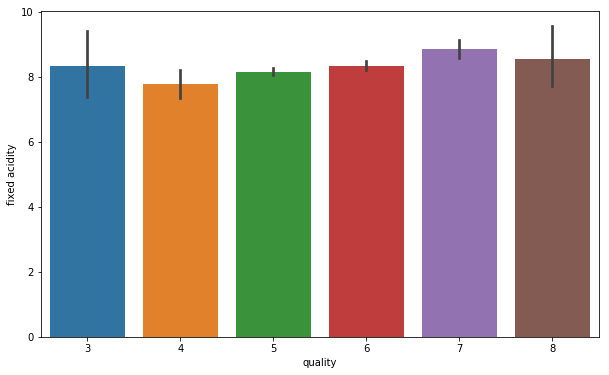

In [6]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

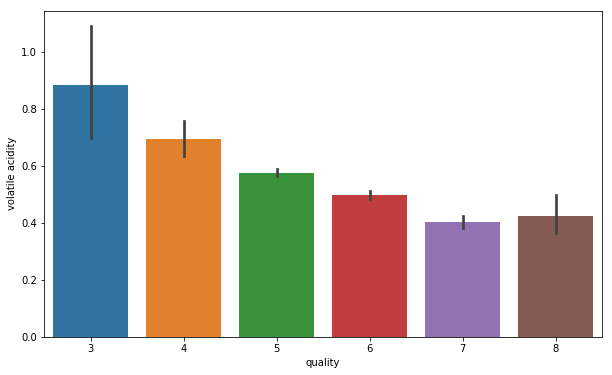

In [7]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

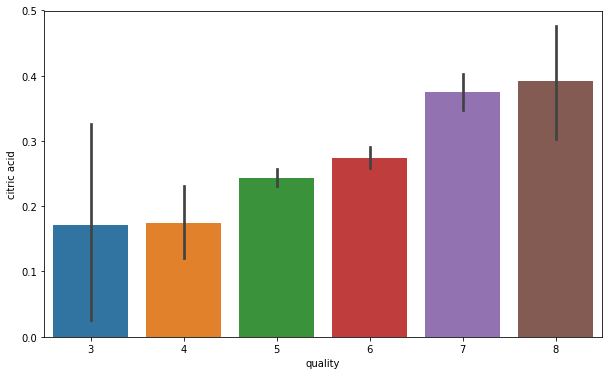

In [8]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

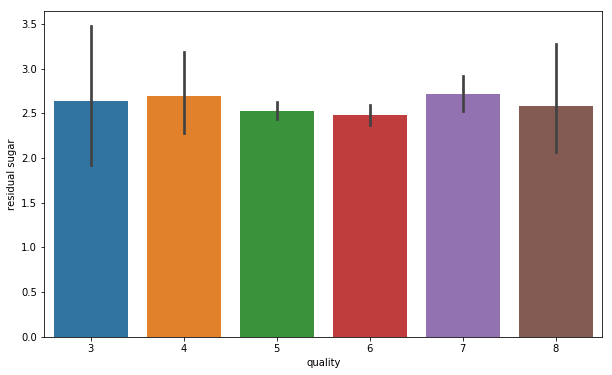

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

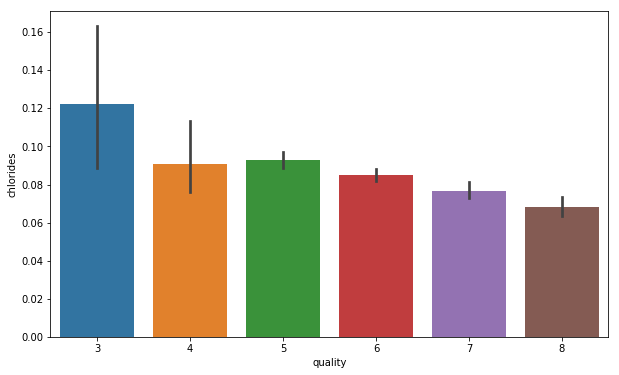

In [10]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

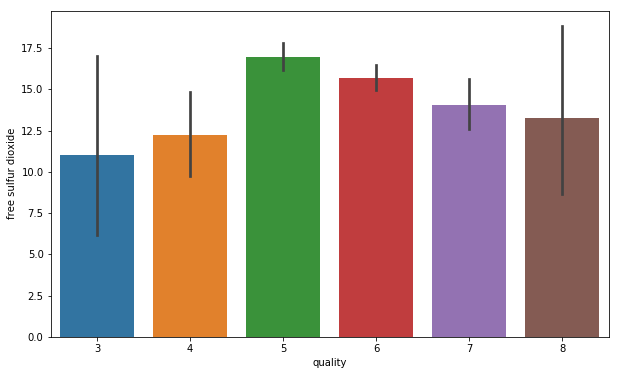

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

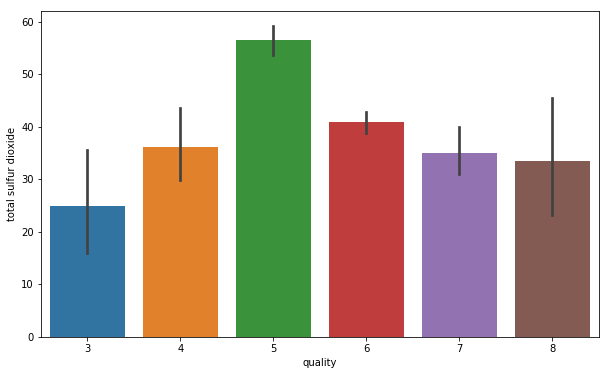

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

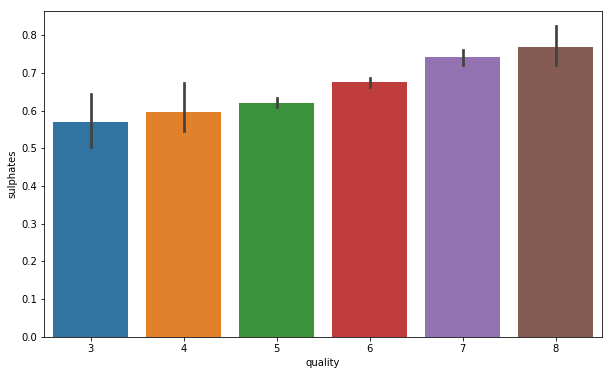

In [13]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

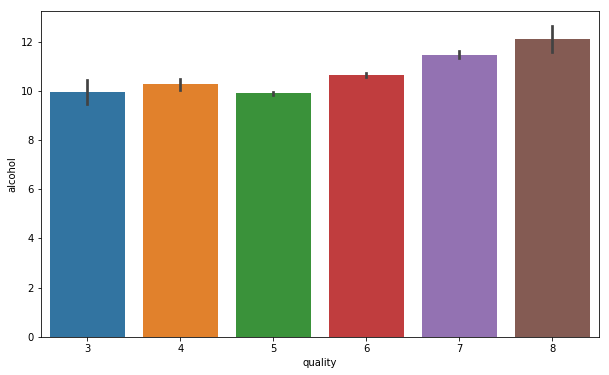

In [14]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [15]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [16]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [17]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [18]:
wine['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

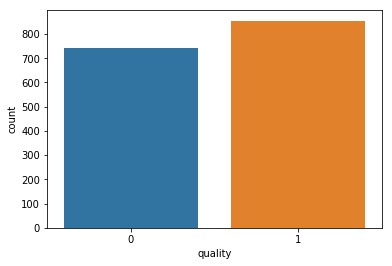

In [19]:
sns.countplot(wine['quality'])

In [20]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [21]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [23]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

## Neural Network

** Perceptron **

In [24]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 117


/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Confusion matrix, without normalization
[[ 91  50]
 [ 67 112]]


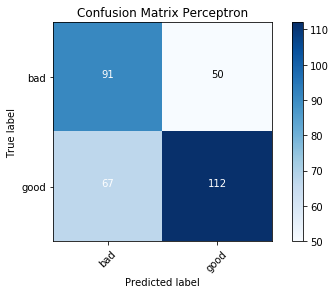

In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Perceptron')
plt.show()
plt.clf()

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/sit

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/rocket/anaconda2/lib/python2.7/sit

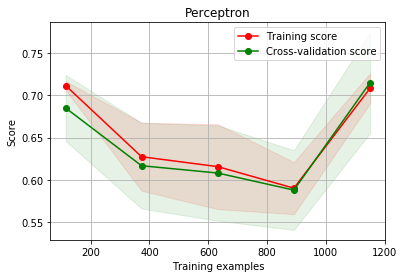

In [26]:
#     Plot learning curve
plot_learning_curve(ppn, "Perceptron", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [27]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.63


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.58      0.65      0.61       141
          1       0.69      0.63      0.66       179

avg / total       0.64      0.63      0.64       320



** MLP Classifier **

In [29]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 78


Confusion matrix, without normalization
[[110  31]
 [ 47 132]]


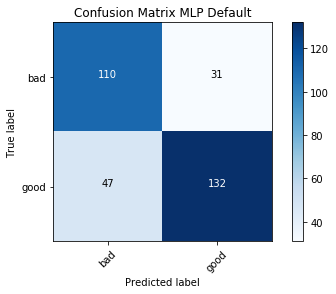

In [30]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP Default')
plt.show()
plt.clf()

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

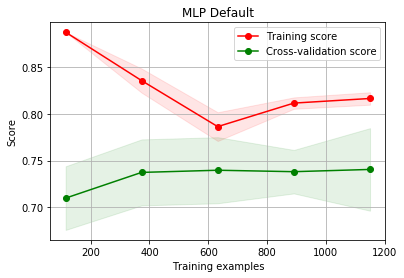

In [31]:
#     Plot learning curve
plot_learning_curve(mlpc, "MLP Default", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [32]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.76


In [33]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.78      0.74       141
          1       0.81      0.74      0.77       179

avg / total       0.76      0.76      0.76       320



In [34]:
mlpc = MLPClassifier(activation='tanh', hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 83
Accuracy: 0.74


In [35]:
mlpc = MLPClassifier(activation='identity', hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 83
Accuracy: 0.74


In [36]:
mlpc = MLPClassifier(activation='logistic', hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 86
Accuracy: 0.73


** SGD **

In [37]:
mlpc = MLPClassifier(solver='sgd', hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 89


/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Confusion matrix, without normalization
[[106  35]
 [ 54 125]]


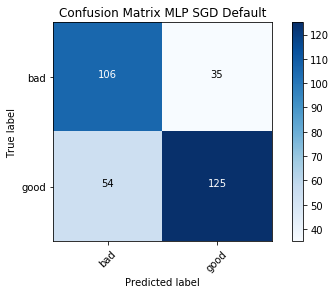

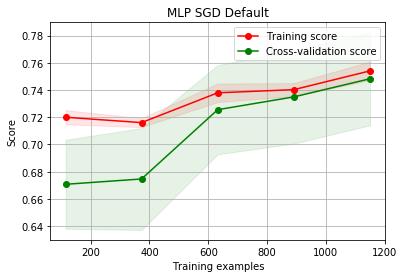

In [38]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP SGD Default')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(mlpc, "MLP SGD Default", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [39]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.72


In [40]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      0.75      0.70       141
          1       0.78      0.70      0.74       179

avg / total       0.73      0.72      0.72       320



** LBFGS **

In [41]:
mlpc = MLPClassifier(solver='lbfgs', alpha=.1, hidden_layer_sizes=(13,13,13), random_state=0)
mlpc.fit(X_train_std, y_train)
y_pred = mlpc.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 88


Confusion matrix, without normalization
[[ 87  54]
 [ 34 145]]


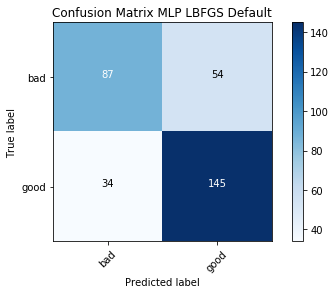

In [42]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix MLP LBFGS Default')
plt.show()
plt.clf()

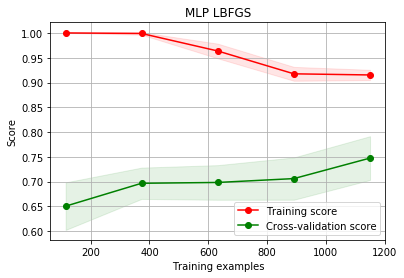

In [43]:
#     Plot learning curve
plot_learning_curve(mlpc, "MLP LBFGS", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

In [44]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.72


In [45]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.62      0.66       141
          1       0.73      0.81      0.77       179

avg / total       0.72      0.72      0.72       320



## Support Vector Machine
** Linear SVC **

In [46]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 86


Confusion matrix, without normalization
[[114  27]
 [ 59 120]]


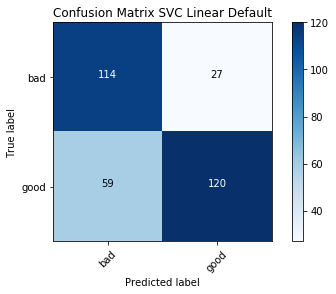

In [47]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Linear Default')
plt.show()
plt.clf()

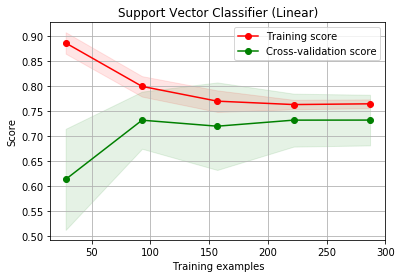

In [48]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (Linear)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [49]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.73


In [50]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      0.81      0.73       141
          1       0.82      0.67      0.74       179

avg / total       0.75      0.73      0.73       320



** Non-linear SVC with rbf **

In [51]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 81


Confusion matrix, without normalization
[[ 70  71]
 [ 10 169]]


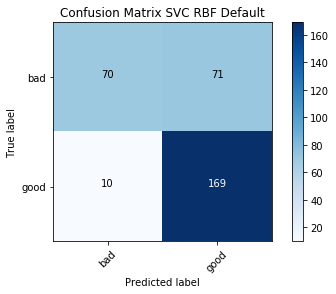

In [52]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC RBF Default')
plt.show()
plt.clf()

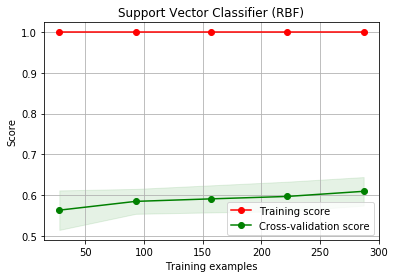

In [53]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (RBF)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [54]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.50      0.63       141
          1       0.70      0.94      0.81       179

avg / total       0.78      0.75      0.73       320



Misclassified samples: 71
Accuracy: 0.78
Confusion matrix, without normalization
[[ 98  43]
 [ 28 151]]


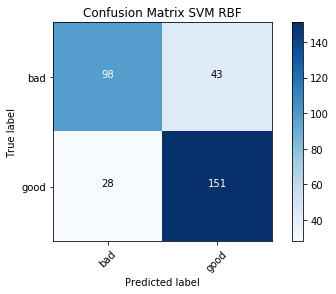

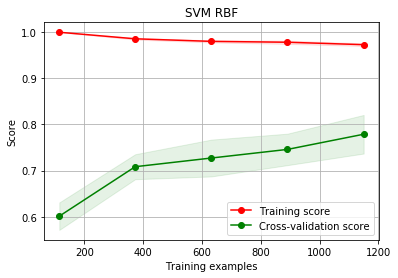

             precision    recall  f1-score   support

          0       0.78      0.70      0.73       141
          1       0.78      0.84      0.81       179

avg / total       0.78      0.78      0.78       320



In [56]:
svm = SVC(kernel='rbf', random_state=0, gamma=.75, C=2)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVM RBF')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(svm, "SVM RBF", X_train_std, y_train, ylim=None, cv=10, n_jobs=4).show()

print(classification_report(y_test, y_pred))

** Non-linear SVC with sigmoid **

In [57]:
svm = SVC(kernel='sigmoid', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 105


Confusion matrix, without normalization
[[ 98  43]
 [ 62 117]]


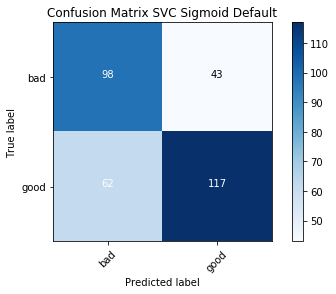

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Sigmoid Default')
plt.show()
plt.clf()

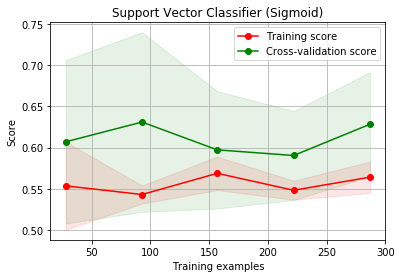

In [59]:
#     Plot learning curve
plot_learning_curve(svm, "Support Vector Classifier (Sigmoid)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

In [60]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.67


In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.61      0.70      0.65       141
          1       0.73      0.65      0.69       179

avg / total       0.68      0.67      0.67       320



** Non-linear SVC with Poly **

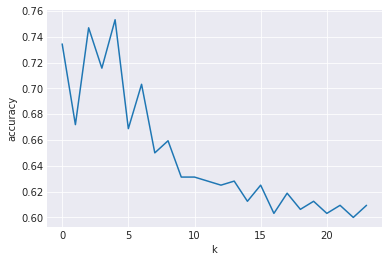

In [68]:
points = []
max_acc = 0
max_svm = None
for i in xrange(1,25):
    svm = SVC(kernel='poly', random_state=0, degree=i, C=1.0)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_svm = svm
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

Confusion matrix, without normalization
[[ 30 111]
 [ 14 165]]


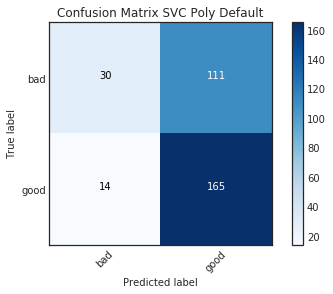

0.753125
{'kernel': 'poly', 'C': 1.0, 'verbose': False, 'probability': False, 'degree': 5, 'shrinking': True, 'max_iter': -1, 'decision_function_shape': 'ovr', 'random_state': 0, 'tol': 0.001, 'cache_size': 200, 'coef0': 0.0, 'gamma': 'auto', 'class_weight': None}


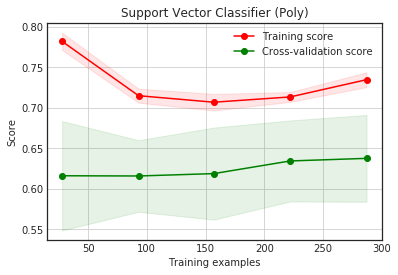

In [69]:
sns.set_style("white")
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix SVC Poly Default')
plt.show()
plt.clf()

print max_acc

print max_svm.get_params()

#     Plot learning curve
plot_learning_curve(max_svm, "Support Vector Classifier (Poly)", X_test_std, y_test, ylim=None, cv=10, n_jobs=4).show()

## K Nearest Neighbors
** All Neighbors **

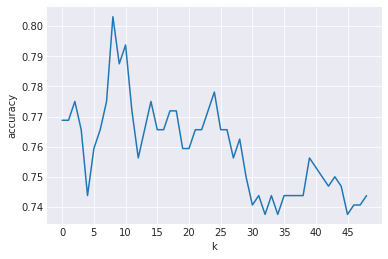

In [347]:
from sklearn.neighbors import KNeighborsClassifier
points = []
max_acc = 0
max_knn = None
for i in xrange(1,50):
    knn = KNeighborsClassifier(weights='distance', leaf_size=1, n_neighbors=i)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_knn = knn
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

{'n_neighbors': 9, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'distance', 'leaf_size': 1}
0.803125
Confusion matrix, without normalization
[[103  38]
 [ 25 154]]


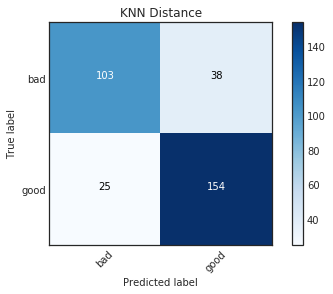

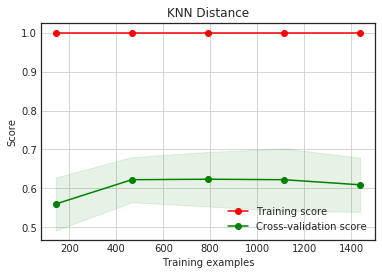

In [348]:
sns.set_style("white")
y_pred = max_knn.predict(X_test_std)
print max_knn.get_params()
print max_acc

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='KNN Distance')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_knn, "KNN Distance", X, y, ylim=None, cv=10, n_jobs=4).show()

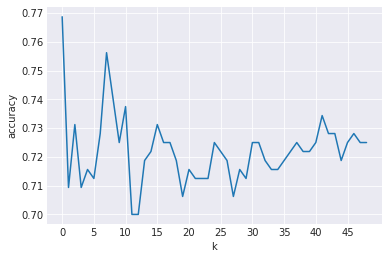

In [349]:
points = []
max_acc = 0
max_knn = None
for i in xrange(1,50):
    knn = KNeighborsClassifier(weights='uniform', leaf_size=1, n_neighbors=i)
    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_knn = knn
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

{'n_neighbors': 1, 'n_jobs': 1, 'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'p': 2, 'weights': 'uniform', 'leaf_size': 1}
0.76875
Confusion matrix, without normalization
[[100  41]
 [ 33 146]]


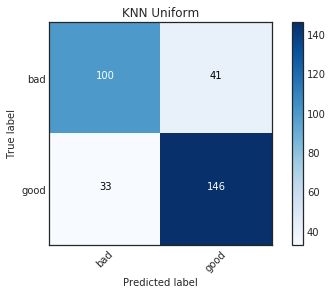

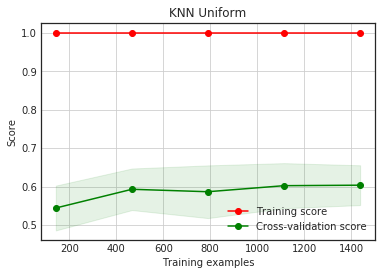

In [350]:
sns.set_style("white")
y_pred = max_knn.predict(X_test_std)

print max_knn.get_params()
print max_acc

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='KNN Uniform')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_knn, "KNN Uniform", X, y, ylim=None, cv=10, n_jobs=4).show()

## Decision Tree
** Gini Criteria **

In [333]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='gini', random_state=0)
dct.fit(X_train_std, y_train)
y_pred = dct.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 99


In [334]:
importance = {'features': X.columns.values,
              'importance': dct.feature_importances_,
              'criteria': ['gini'] * X.shape[1]}

Confusion matrix, without normalization
[[ 98  43]
 [ 56 123]]


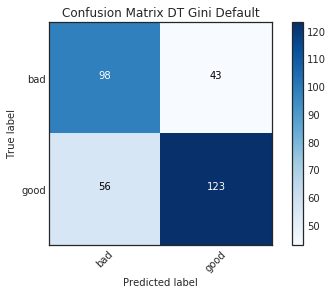

In [335]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix DT Gini Default')
plt.show()
plt.clf()

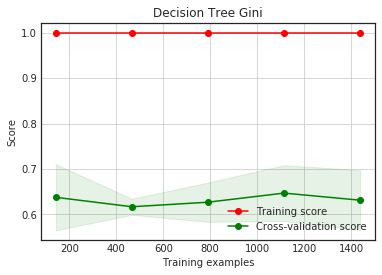

In [336]:
#     Plot learning curve
plot_learning_curve(dct, "Decision Tree Gini", X, y, ylim=None, cv=10, n_jobs=4).show()

In [337]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.69


In [338]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      0.70      0.66       141
          1       0.74      0.69      0.71       179

avg / total       0.69      0.69      0.69       320



** Entropy Criteria **

In [339]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=0)
dct.fit(X_train_std, y_train)
y_pred = dct.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 84


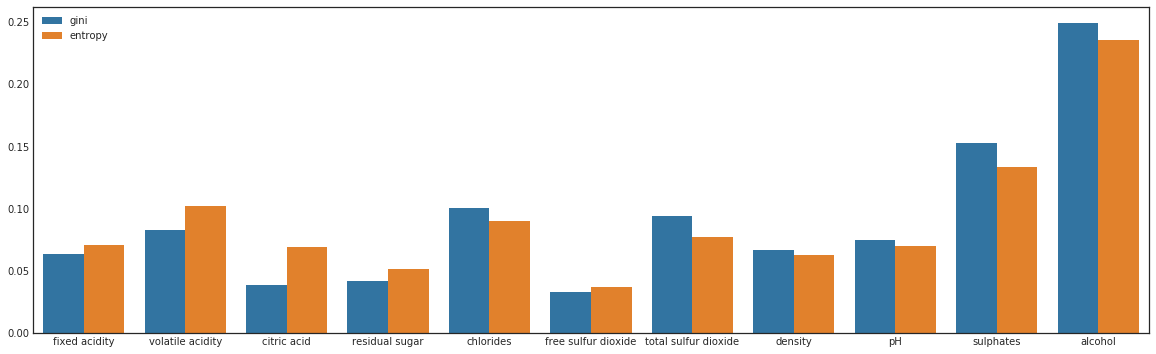

In [340]:
importance['features'] = np.concatenate((importance['features'], X.columns.values))
importance['importance'] = np.concatenate((importance['importance'], dct.feature_importances_))
importance['criteria'] = importance['criteria'] + (['entropy'] * X.shape[1])
fig = plt.figure(figsize = (20,6))
sns.barplot(hue='criteria', x = 'features', y = 'importance', data = importance)
plt.show()

Confusion matrix, without normalization
[[104  37]
 [ 47 132]]


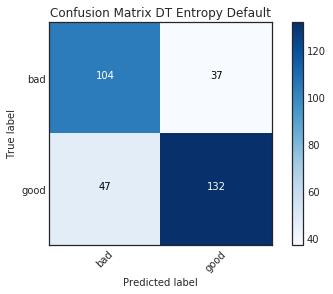

In [341]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix DT Entropy Default')
plt.show()
plt.clf()

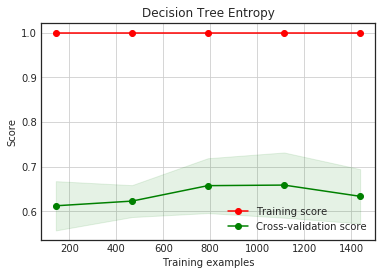

In [342]:
#     Plot learning curve
plot_learning_curve(dct, "Decision Tree Entropy", X, y, ylim=None, cv=10, n_jobs=4).show()

In [343]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.74


In [344]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.74      0.71       141
          1       0.78      0.74      0.76       179

avg / total       0.74      0.74      0.74       320



## Adaboost
** Boost SVM **

In [390]:
from sklearn.ensemble import AdaBoostClassifier
boost = SVC(random_state=0)
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

boost = AdaBoostClassifier(SVC(random_state=0), algorithm='SAMME')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 75
Accuracy: 0.77
Misclassified samples: 141
Accuracy: 0.56


In [389]:
boost = SVC(random_state=0, decision_function_shape='ovo', C=2.25, coef0=2.5, gamma=0.70000000000000007, kernel='sigmoid')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
boost = AdaBoostClassifier(SVC(random_state=0, decision_function_shape='ovo', C=2.25, coef0=2.5, gamma=0.70000000000000007, kernel='sigmoid'), algorithm='SAMME')
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 135
Accuracy: 0.58
Misclassified samples: 116
Accuracy: 0.64


Confusion matrix, without normalization
[[ 38 103]
 [ 13 166]]


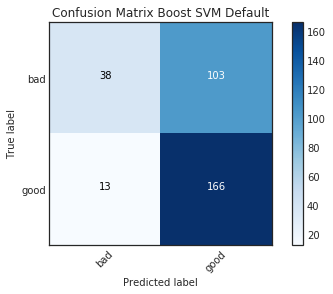

In [383]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Boost SVM Default')
plt.show()
plt.clf()

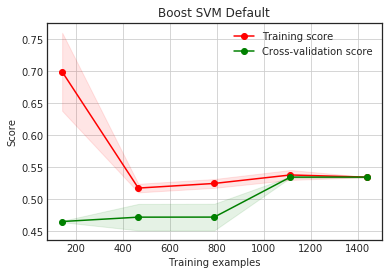

In [384]:
#     Plot learning curve
plot_learning_curve(boost, "Boost SVM Default", X, y, ylim=None, cv=10, n_jobs=4).show()

In [386]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.27      0.40       141
          1       0.62      0.93      0.74       179

avg / total       0.67      0.64      0.59       320



** Boost Decision Tree **

In [392]:
boost = DecisionTreeClassifier(random_state=0)
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print accuracy_score(y_test, y_pred)

boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=0))
boost.fit(X_train_std, y_train)
y_pred = boost.predict(X_test_std)
print accuracy_score(y_test, y_pred)

0.690625
0.69375


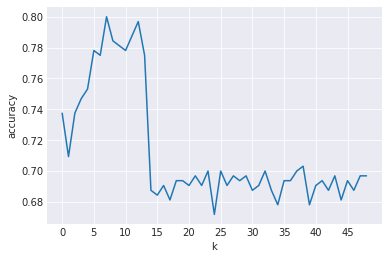

In [377]:
points = []
max_acc = 0
max_boost = None

for depth in xrange(1, 50):
    boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=0, max_depth=depth))
    boost.fit(X_train_std, y_train)
    y_pred = boost.predict(X_test_std)
    points.append(accuracy_score(y_test, y_pred))
    if max_acc < points[-1]:
        max_acc = points[-1]
        max_boost = boost
sns.set_style("darkgrid")
plt.xticks(range(0,50, 5))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(points)
plt.show()

0.8
{'base_estimator__min_samples_split': 2, 'base_estimator__max_depth': 8, 'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'), 'base_estimator__criterion': 'gini', 'base_estimator__max_features': None, 'base_estimator__random_state': 0, 'n_estimators': 50, 'base_estimator__min_weight_fraction_leaf': 0.0, 'random_state': None, 'base_estimator__class_weight': None, 'base_estimator__splitter': 'best', 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__presort': False, 'base_estimator__min_impurity_split': None}
Confusion matrix, without normalizat

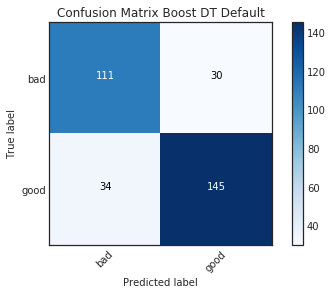

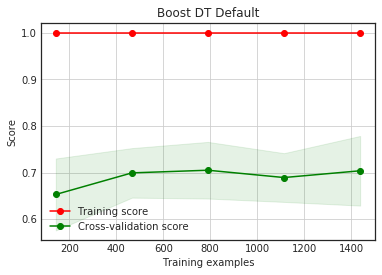

In [393]:
sns.set_style("white")
y_pred = max_boost.predict(X_test_std)

print max_acc

print max_boost.get_params()

cnf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=group_names, title='Confusion Matrix Boost DT Default')
plt.show()
plt.clf()

#     Plot learning curve
plot_learning_curve(max_boost, "Boost DT Default", X, y, ylim=None, cv=10, n_jobs=4).show()

In [394]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.79      0.78       141
          1       0.83      0.81      0.82       179

avg / total       0.80      0.80      0.80       320



# Grid Search
** Neural Network **

In [98]:
classifiers = {}

In [115]:
plt.clf()

tuned_parameters = [{'activation': ['relu', 'identity', 'logistic', 'tanh'],
                     'solver': ['sgd'],
                     'hidden_layer_sizes': [(100,), (13, 13, 13, 13)],
                     'learning_rate': ['constant', 'adaptive'],
                     'learning_rate_init': [1.1, 1, 1e-1, 1e-2],
                     'max_iter': [400, 800, 10000]},
                    {'activation': ['relu', 'identity', 'logistic', 'tanh'],
                     'solver': ['sgd'],
                     'hidden_layer_sizes': [(100,), (13, 13, 13, 13)],
                     'learning_rate': ['invscaling'],
                     'learning_rate_init': [1.1, 1, 1e-1, 1e-2],
                     'power_t': [0.75, 0.5, 1e-1],
                     'max_iter': [400, 800, 10000]}]

clf = GridSearchCV(MLPClassifier(random_state=0), tuned_parameters, cv=10, verbose=0, scoring='accuracy', n_jobs=4)
clf.fit(X_train_std, y_train)

classifiers['NN'] = clf

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:614: RuntimeWarning: invalid value encountered in greater
  y = np.array(y > threshold, dtype=np.int)
/home/rocket/anaconda2/lib/python

In [ ]:
clf = classifiers['NN']

print("Best parameters set found on development set:")
print(clf.best_params_)
print
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print

print("Detailed classification report:")
print
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print
y_true, y_pred = y_test, clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print


In [ ]:
#     Plot learning curve
plot_learning_curve(clf, "Neural Networks (Optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()

** Support Vector Machine **

In [354]:
plt.clf()

tuned_parameters = [{'C': np.arange(0.25, 3.0),
                     'kernel': ['rbf'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr']},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['sigmoid'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr'],
                     'coef0': np.arange(0.25, 3.0, 0.25)},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['linear'],
                     'decision_function_shape': ['ovo', 'ovr'],
                     'max_iter': range(100, 10000, 100)},
#                     {'C': np.arange(0.25, 3.0),
#                      'kernel': ['poly'],
#                      'degree': range(1, 6),
#                      'gamma': np.arange(0.1, 2.0, 0.1),
#                      'coef0': np.arange(0.25, 3.0, 0.25),
#                      'decision_function_shape': ['ovo', 'ovr']},
                    {'C': np.arange(0.25, 3.0),
                     'kernel': ['sigmoid'],
                     'gamma': np.arange(0.1, 2.0, 0.1),
                     'decision_function_shape': ['ovo', 'ovr'],
                     'coef0': np.arange(0.25, 3.0, 0.25)}]

svm_trained = []

for params in tuned_parameters:
    svm_trained.append(GridSearchCV(SVC(random_state=0), params, cv=10, verbose=0, scoring='accuracy', n_jobs=4))
    svm_trained[-1].fit(X_train_std, y_train)
    print "Another one bites the dust!"

classifiers['SVM'] = svm_trained

Another one bites the dust!
Another one bites the dust!


/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=9900).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/roc

/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7700).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=7800).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/rocket/anaconda2/lib/python2.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ro

Another one bites the dust!
Another one bites the dust!


In [369]:
for clf in classifiers['SVM']:
    print
    print
    print "NEW THINGY!!!!!"
    print

    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    min_mean = 1.0
    min_params = None
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        if mean < min_mean:
            min_mean = mean
            min_params = params
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
    print

    print("Detailed classification report:")
    print
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print
    y_true, y_pred = y_test, clf.predict(X_test_std)
    print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print

print min_params
print min_mean



NEW THINGY!!!!!

Best parameters set found on development set:
{'kernel': 'rbf', 'C': 2.25, 'decision_function_shape': 'ovo', 'gamma': 0.59999999999999998}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.77
             precision    recall  f1-score   support

          0       0.75      0.72      0.73       141
          1       0.78      0.82      0.80       179

avg / total       0.77      0.77      0.77       320




NEW THINGY!!!!!

Best parameters set found on development set:
{'decision_function_shape': 'ovo', 'C': 1.25, 'coef0': 2.75, 'gamma': 0.10000000000000001, 'kernel': 'sigmoid'}

Grid scores on development set:

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

Accuracy: 0.67
             precision    recall  f1-score   support

          0       0.63   

In [ ]:
#     Plot learning curve

plot_learning_curve(clf, "Support Vector Machine (Optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()

In [352]:
plt.clf()

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'splitter': ['random', 'best'],
                     'max_depth': range(1, 50),
                     'min_samples_split': np.arange(0.05, 1.0, 0.05),
                     'min_samples_leaf': np.arange(0.05, 0.5, 0.5),
                     'presort': [True]}]

clf = GridSearchCV(DecisionTreeClassifier(random_state=0), tuned_parameters, cv=10, verbose=0, scoring='accuracy', n_jobs=4)
clf.fit(X_train_std, y_train)

classifiers['DT'] = clf

In [353]:
clf = classifiers['DT']

print("Best parameters set found on development set:")
print(clf.best_params_)
print
print("Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print

print("Detailed classification report:")
print
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print
y_true, y_pred = y_test, clf.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))
print


Best parameters set found on development set:
{'presort': True, 'splitter': 'best', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.15000000000000002, 'max_depth': 5}

Grid scores on development set:
0.579 (+/-0.078) for {'presort': True, 'splitter': 'random', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'gini', 'min_samples_split': 0.050000000000000003, 'max_depth': 1}
0.685 (+/-0.100) for {'presort': True, 'splitter': 'best', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'gini', 'min_samples_split': 0.050000000000000003, 'max_depth': 1}
0.579 (+/-0.078) for {'presort': True, 'splitter': 'random', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'gini', 'min_samples_split': 0.10000000000000001, 'max_depth': 1}
0.685 (+/-0.100) for {'presort': True, 'splitter': 'best', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'gini', 'min_samples_split': 0.10000000000000001, 'max_depth': 1}
0.579 (+/-0.078) for {'presort': 

0.573 (+/-0.079) for {'presort': True, 'splitter': 'random', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.55000000000000004, 'max_depth': 27}
0.690 (+/-0.103) for {'presort': True, 'splitter': 'best', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.55000000000000004, 'max_depth': 27}
0.568 (+/-0.087) for {'presort': True, 'splitter': 'random', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.60000000000000009, 'max_depth': 27}
0.688 (+/-0.103) for {'presort': True, 'splitter': 'best', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.60000000000000009, 'max_depth': 27}
0.568 (+/-0.087) for {'presort': True, 'splitter': 'random', 'min_samples_leaf': 0.050000000000000003, 'criterion': 'entropy', 'min_samples_split': 0.65000000000000013, 'max_depth': 27}
0.688 (+/-0.103) for {'presort': True, 'splitter': 'best', 'min_samples_le

In [ ]:
#     Plot learning curve
plot_learning_curve(clf, "Support Vector Classifier (Optimized)", X, y, ylim=None, cv=10, n_jobs=4).show()